## Assignment Week 5

This week we are using numpy and matplotlib

In [3]:
# Start by loading the relevant libraries
import numpy as np

### Numpy: Magic Square

A <A HREF="https://en.wikipedia.org/wiki/Magic_square">magic square</A> is a matrix in which the sum of all rows, columns and diagonals are the same.
You can verify this fact for the matrix below by:
  * calculating an array containing the sums of all rows
  * calculate the minimum and maximum of this array
  * calculating an array containing the sum of all columns
  * calculate the minimum and maximum of this array
  * calculating the sum of both diagonals
  * check that both minimums and maximums and diagonals are the same value.

```python
msquare = np.array([
    [17, 24,  1,  8, 15],
    [23,  5,  7, 14, 16],
    [ 4,  6, 13, 20, 22],
    [10, 12, 19, 21,  3],
    [11, 18, 25,  2,  9]])
```

**Assignment 5.1**

Write a function **is_magic_square()** that takes a matrix as input and returns **True** if the matrix is a magic square and **False** otherwise. Use the matrix above to test your function.

*Hint*: Use np.diag and np.fliplr to get the diagonals of a matrix.


In [16]:
# Define the matrix for testing
msquare = np.array([
    [17, 24,  1,  8, 15],
    [23,  5,  7, 14, 16],
    [ 4,  6, 13, 20, 22],
    [10, 12, 19, 21,  3],
    [11, 18, 25,  2,  9]])

# Define the function is_magic_square()
def is_magic_square(mat_input):
    rowsum = mat_input.cumsum(axis = 0)
    colsum = mat_input.cumsum(axis = 1)
    
    max_row = rowsum[mat_input.shape[0] - 1,:].max()
    max_col = colsum[:,mat_input.shape[1] - 1].max()
    
    min_row = rowsum[mat_input.shape[0] - 1,:].min()
    min_col = colsum[:,mat_input.shape[1] - 1].min()
    
    # get the diagonal of original matrix
    # sum the diagonal of the matrix
    diag_mat_input = np.diag(mat_input)
    sum_diag = sum(diag_mat_input)
    
    # reverse the matrix
    # sum the diagonal of the reversed matrix
    diag_mat_reverse = np.diag(np.fliplr(mat_input))
    sum_diag_reverse = sum(diag_mat_reverse)
    
    return(max_row == max_col == min_row == min_col == sum_diag == sum_diag_reverse)

# Validating the function to matrix msquare
is_magic_square(msquare)

True

### Generating Magic Squares

The above function can be used in a (crude) method to generate magic squares

**Assignment 5.2**

Write a function **generateMagicSquare()** that generates a 3x3 magic square (containing numbers 1...9). 

Use the following algorithm:

  * Use the function **is_magic_square()** from the previous question to check if a matrix is a valid magic square or not.
  * Generate random 3x3 squares filled with the exact numbers 1..9 in some order and check if that matrix is a magic square. If so, print the magic square.
  
  * You may need to generate 100,000 matrices to find one that is a magic square (by chance).
  
*Hint*: Use np.random.permutation to generate a random permutation of an array.

In [20]:
# Define generateMagicSquare function
def generateMagicSquare():
    i = 0
    while i < 100000:
        
        make_matrix = np.random.permutation(np.arange(1,10)).reshape((3,3))
        
        if is_magic_square(make_matrix):
            return make_matrix
            break
        else:
            i += 1
            continue
    
    print('Matrix is not found')
    
# Testing the function and generate the magic square by chance
generateMagicSquare()

array([[6, 7, 2],
       [1, 5, 9],
       [8, 3, 4]])

### Matplotlib: Functions

In [5]:
# Also make sure that you have the correct libraries loaded here

%matplotlib inline

import matplotlib.pyplot as plt

### More grading

This question continues from the exercise made in class (see file 'Week5_numpy_class.ipynb' and 'Week5_numpy_class-s.ipynb'). We quickly recreate the dataset here, see the aforementioned files for details.



In [21]:
# create students and grades arrays, using random grades
students = np.array(['Anne', 'Bob', 'Mary', 'John', 'Julia', 'Mike', 'Susan', 'Zach'])
grades = np.random.rand( 8,20 )* 6 + 4

# create an array with the average grades per student 
avg_grades = grades.mean(axis=1)

# create a masked array where we mask away all grades below 5.8
masked_grades = np.ma.masked_array( grades, grades < 5.8 )

# calculate the averages per student
avg_grades = masked_grades.mean( axis = 1 ) 

# print the array to see what we have
avg_grades

masked_array(data = [8.006971450346118 8.351165191326507 7.810710929988642 7.55713869693364
 8.170960299564909 7.720667074119968 8.213543424698798 8.074831714666127],
             mask = [False False False False False False False False],
       fill_value = 1e+20)

 **Assignment 5.3**

Using the above data, do the following:

  1. Plot the avarage grade per student in a bar chart, set the axis and labels accordingly.
  2. Plot the average grades for each of the 20 assignments.
  3. Try to fit a line to this line and try to predict the average grades for the next assignment. Plot the result.
     
     *Hint* Use np.polyfit() to find a fitting function. Use np.polyval() to evaluate a polynomial. How does the degree of the polynomial effect the fitting?

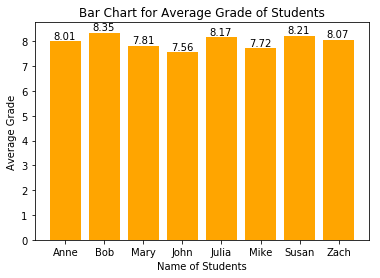

In [22]:
# Assignment 5.3.1
# Using masked data where grade <5.8 masked from the result
plt.bar(np.arange(avg_grades.shape[0]),avg_grades,align='center',color='orange')
plt.xlabel('Name of Students')
plt.xticks(np.arange(avg_grades.shape[0]), students)
plt.ylabel('Average Grade')
plt.title("Bar Chart for Average Grade of Students")

for x, y in zip(np.arange(avg_grades.shape[0]), avg_grades):
    plt.text(x-0.3, y+0.1, '%.2f' %(y))

plt.show()

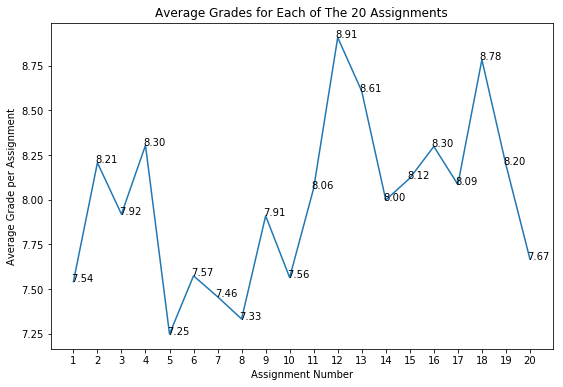

In [23]:
# Assignment 5.3.2 - Masked
# Using masked data where grade <5.8 masked from the result
average_masked_assignment = masked_grades.mean(axis = 0)

plt.figure(figsize=(9,6))
plt.plot(np.arange(len(average_masked_assignment))+1, average_masked_assignment)
plt.xticks(np.arange(len(average_masked_assignment))+1)

for x,y in zip(np.arange(len(average_masked_assignment))+1, average_masked_assignment):
    plt.text(x-0.1,y,'%.2f' %(y))

plt.xlabel('Assignment Number')
plt.ylabel('Average Grade per Assignment')
plt.title('Average Grades for Each of The 20 Assignments')

plt.show()

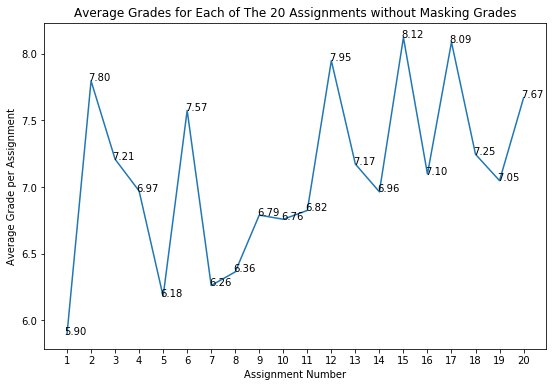

In [24]:
# Assignment 5.3.2 - Not masked
# NOT Using masked data where grade <5.8 masked from the result
avg_grades_nonmask = grades.mean(axis=0)

plt.figure(figsize=(9,6))
plt.plot(np.arange(len(avg_grades_nonmask))+1, avg_grades_nonmask)
plt.xticks(np.arange(len(avg_grades_nonmask))+1)

for x,y in zip(np.arange(len(avg_grades_nonmask))+1, avg_grades_nonmask):
    plt.text(x-0.1,y,'%.2f' %(y))

plt.xlabel('Assignment Number')
plt.ylabel('Average Grade per Assignment')
plt.title('Average Grades for Each of The 20 Assignments without Masking Grades')

plt.show()

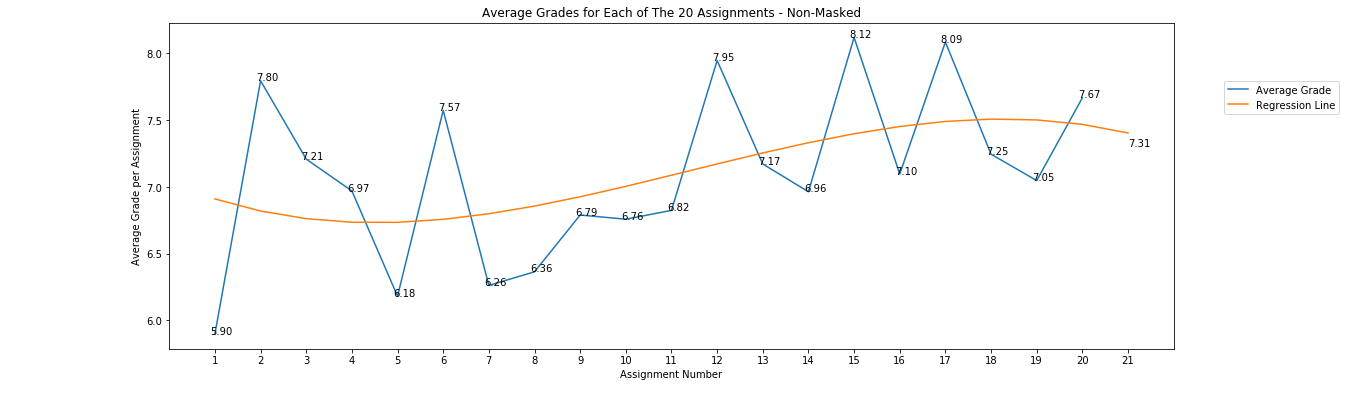

In [27]:
# Assignment 5.3.3 - Non-Masked
avg_grades_nonmask_2 = grades.mean(axis=0)

# Define coefficient of polynomial
coef = np.polyfit(np.arange(len(avg_grades_nonmask)), avg_grades_nonmask_2,3)
fit_line = np.polyval(coef,np.arange(len(avg_grades_nonmask_2)+1))

# Plotting
plt.figure(figsize=(18,6))
plt.plot(np.arange(len(avg_grades_nonmask_2))+1, avg_grades_nonmask_2, label = 'Average Grade')
plt.plot(np.arange(len(avg_grades_nonmask_2)+1)+1, fit_line, label = 'Regression Line')
plt.xticks(np.arange(len(avg_grades_nonmask_2)+1)+1)

for x,y in zip(np.arange(len(avg_grades_nonmask_2))+1, avg_grades_nonmask_2):
    plt.text(x-0.1,y,'%.2f' %(y))

# Forecasted score label
plt.text(21,np.polyval(coef,21),'%.2f' %(np.polyval(coef,21)))
plt.annotate('Forecasted Score', fontsize=9, xy=(x,y), xytext=(20,8.75),arrowprops={'arrowstyle':'simple'})
    
plt.xlabel('Assignment Number')
plt.ylabel('Average Grade per Assignment')
plt.title('Average Grades for Each of The 20 Assignments - Non-Masked')
plt.legend(loc=((1.05,0.72)))

plt.show()